# # Laptop Price Prediction 

Object of this project is to predict the real value/price of the laptop by using regression method. 

In this project, we first did 
data cleaning because data is not in proper formate. After that we applied feature engeeniring so, we create some new feature
by using information of old features. Then we did data visualization to analys which feature more important for creation of model.
final step was to create model, for creation of model we import some libraries then apply few reggression technique to check which reggression
method gave best aacuraccy. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
laptop_df=pd.read_csv("C:/Users/archa/Laptop price prediction/Laptop price p/laptop_price_data.csv")

In [3]:
laptop_df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
laptop_df.shape

(1303, 12)

In [5]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
laptop_df.duplicated().sum()

0

In [7]:
laptop_df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

we can see there is no need of 'unnammed : 0' column ,so we should drop that column.

In [8]:
laptop_df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


now, we need only numeric value in 'Ram' and 'Weight' column. so we will apply replace method and take only numeric value.

In [10]:
laptop_df['Ram']=laptop_df['Ram'].str.replace("GB","")

In [11]:
laptop_df["Weight"]=laptop_df["Weight"].str.replace("kg","")

In [12]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
laptop_df['Ram']=laptop_df['Ram'].astype('int32')

In [14]:
laptop_df["Weight"]=laptop_df["Weight"].astype('float32')

In [15]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [16]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<AxesSubplot:>

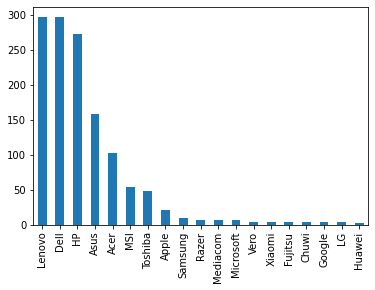

In [17]:
laptop_df['Company'].value_counts().plot(kind='bar')

C:\Users\archa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

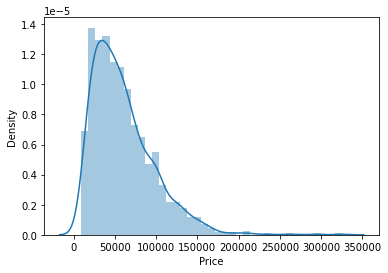

In [18]:
sns.distplot(laptop_df['Price'])

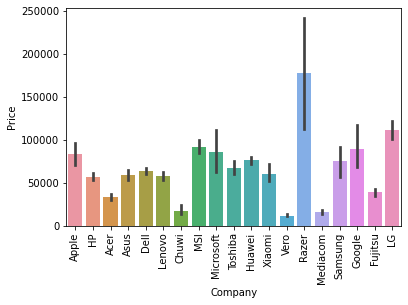

In [19]:
sns.barplot(x=laptop_df["Company"],y=laptop_df["Price"])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

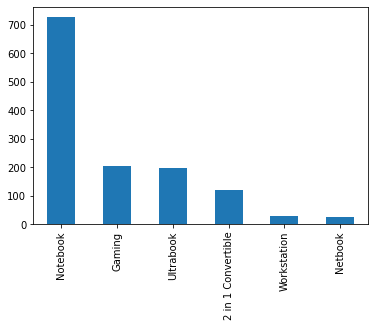

In [20]:
laptop_df['TypeName'].value_counts().plot(kind='bar')

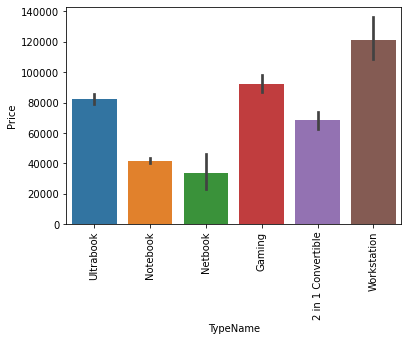

In [21]:
sns.barplot(x=laptop_df["TypeName"],y=laptop_df["Price"])
plt.xticks(rotation='vertical')
plt.show()

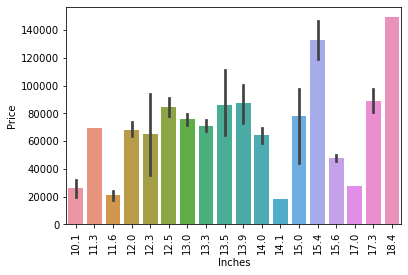

In [22]:
sns.barplot(x=laptop_df['Inches'],y=laptop_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [23]:
laptop_df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440               

so we can see there is lot of mix information in 'ScreenResolution' columns. now, we need to seperate that information into a perticular columns so it can be easy to predict laptop price

In [24]:
laptop_df['Touchscreen']=laptop_df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [25]:
laptop_df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
154,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7500U 2.7GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,57648.9600,0
1083,HP,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.30,109170.7200,0
1122,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,80612.6400,0
883,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.20,35644.3200,0
338,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Linux,2.00,14651.4672,0
1008,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,55904.5728,0
370,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,58554.7200,1
841,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,163723.5792,0
872,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,73952.6400,0
439,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Linux,2.00,29783.5200,0


<AxesSubplot:>

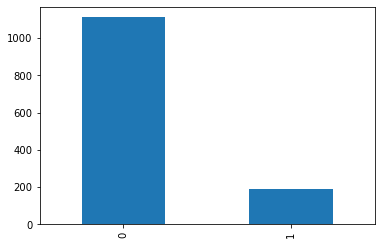

In [26]:
laptop_df['Touchscreen'].value_counts().plot(kind='bar')

In [27]:
laptop_df['IPS']=laptop_df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
laptop_df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

In [29]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:xlabel='IPS', ylabel='Price'>

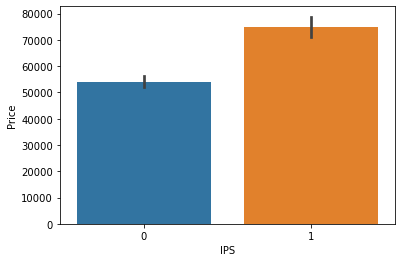

In [30]:
sns.barplot(x=laptop_df['IPS'],y=laptop_df['Price'])

In [31]:
new=laptop_df['ScreenResolution'].str.split('x', n=1, expand=True)

In [32]:
laptop_df['x_res']=new[0]
laptop_df['y_res']=new[1]

In [33]:
laptop_df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
1054,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.20,120093.12,1,0,Quad HD+ / Touchscreen 3200,1800
1195,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.56,0,1,IPS Panel Full HD 1920,1080
985,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon R5 M430,Windows 10,2.25,31914.72,0,0,1366,768
176,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.10,23922.72,0,0,1366,768
548,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,21152.16,0,0,Full HD 1920,1080


we can see 'x_res' column contain lot of unwanted data. so we can apply regular regression and take only numeric value.  

In [34]:
laptop_df['x_res']=laptop_df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [35]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
laptop_df['x_res']=laptop_df['x_res'].astype('int')
laptop_df['y_res']=laptop_df['y_res'].astype('int')

In [37]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [38]:
laptop_df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

We can see there is no stronger relationship between price and inches.
so we can create new column PPI(Pixel per inches),this column will be very helpfull to predict perfect price of laptop.
now,we can use x_resolution,y_resolution and inches. using these column we can find PPI

formula of PPI=(Square root of((x_res^2)+(y_res^2)))/inches

In [39]:
laptop_df['PPI']=((((laptop_df['x_res']**2)+(laptop_df['y_res']**2))**0.5)/laptop_df['Inches']).astype('float')

In [40]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [41]:
laptop_df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

now,we have PPI so we don't need few columns Like inches,x_res,y_res and screenresolution.
so now we can drop these column

In [42]:
laptop_df.drop(columns=['Inches','ScreenResolution','x_res','y_res'], inplace=True)

In [43]:
laptop_df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [44]:
laptop_df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i3 6100U 2.1GHz                1
Intel Core i5 2.9GHz                      1
Intel Core M m3-7Y30 2.2GHz               1
Intel Xeon E3-1535M v5 2.9GHz             1
Intel Pentium Dual Core 4405Y 1.5GHz      1
Name: Cpu, Length: 118, dtype: int64

so here we can see 118 unique value. we need starting 3 words.
now we will apply lambda function and then split the string 

In [45]:
laptop_df['Cpu name']=laptop_df['Cpu'].apply(lambda x:x.split()[0:3])

In [46]:
laptop_df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,"[Intel, Core, i5]"
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,"[Intel, Core, i5]"
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,"[Intel, Core, i5]"
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,"[Intel, Core, i7]"
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,"[Intel, Core, i5]"


In [47]:
laptop_df['Cpu name']=laptop_df['Cpu name'].str.join(" ")

In [48]:
laptop_df["Cpu name"].sample(10)

156             Intel Core i3
292             Intel Core i3
1058            Intel Core i7
385             Intel Core i7
1134            Intel Core i5
1046            Intel Core i5
153             Intel Core i7
420             Intel Core i7
101     AMD E-Series E2-9000e
924             Intel Core i5
Name: Cpu name, dtype: object

now we have "cpu name" column. so we needs only some unique value.
so we will apply function on it.

In [49]:
def fun_processor(text):
    if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
        return text
    else:
        if text.split()[0]=="Intel":
            return 'other Intel processor'
        else:
            return 'AMD processor'

In [50]:
laptop_df['Cpu Brand']=laptop_df['Cpu name'].apply(fun_processor)

<AxesSubplot:>

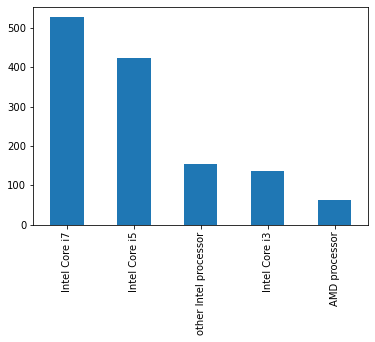

In [51]:
laptop_df['Cpu Brand'].value_counts().plot(kind='bar')

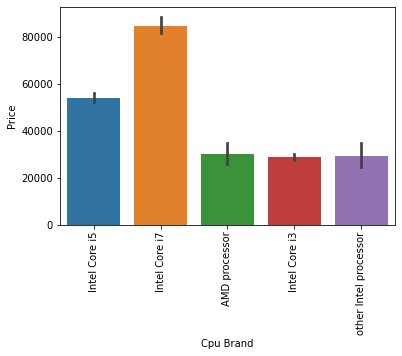

In [52]:
sns.barplot(x=laptop_df["Cpu Brand"],y=laptop_df["Price"])
plt.xticks(rotation='vertical')
plt.show()

now we don't need 'cpu' and 'cpu name' columns. so, we will drop these columns

In [53]:
laptop_df.drop(columns=['Cpu','Cpu name'], inplace=True)

In [54]:
laptop_df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

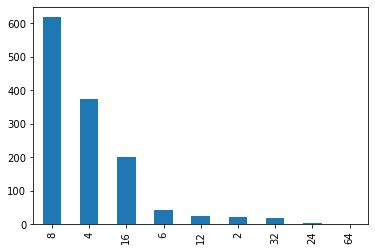

In [55]:
laptop_df['Ram'].value_counts().plot(kind='bar')

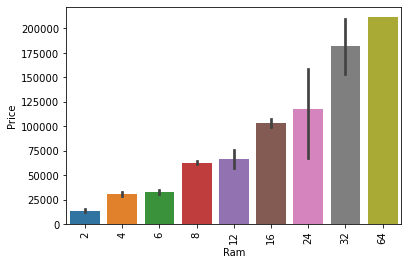

In [56]:
sns.barplot(x=laptop_df["Ram"],y=laptop_df["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
laptop_df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
508GB Hybrid                       1
3

now we can divided memory columns into four new columns for the better result.
we can create 'SSD','HDD','Hybrid' and 'Flash Storage' columns.
then we can check corelationship between these columns with price column.
after that we can drop some coumns if its not important.

In [58]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   IPS          1303 non-null   int64  
 10  PPI          1303 non-null   float64
 11  Cpu Brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


In [59]:
# using regular expression we can take only integer value. then we replace GB and TB and split the string 

laptop_df['Memory'] = laptop_df['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_df["Memory"] = laptop_df["Memory"].str.replace('GB', '')
laptop_df["Memory"] = laptop_df["Memory"].str.replace('TB', '000')

#now we store this split value into a 'new' dataframe for temporary. 
new = laptop_df["Memory"].str.split("+", n = 1, expand = True)


laptop_df["first"]= new[0]
laptop_df["first"]=laptop_df["first"].str.strip()

laptop_df["second"]= new[1]

# create 4 columns and filling it bu using 'First' column data
laptop_df["Layer1HDD"] = laptop_df["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer1SSD"] = laptop_df["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer1Hybrid"] = laptop_df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer1Flash_Storage"] = laptop_df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# so we will remove character from 'Frist' column.now, only take numeric value from the record by using regular expression 
laptop_df['first'] = laptop_df['first'].str.replace(r'\D', '')

# there are few record have some null value, so it will fill by "0"
laptop_df["second"].fillna("0", inplace = True)

# create 4 columns and filling it bu using 'Second' column data
laptop_df["Layer2HDD"] = laptop_df["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer2SSD"] = laptop_df["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer2Hybrid"] = laptop_df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer2Flash_Storage"] = laptop_df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# now take only numeric value form 'second' column by using replace method. 
laptop_df['second'] = laptop_df['second'].str.replace(r'\D', '')

#now change data type of both the columns.
laptop_df["first"] = laptop_df["first"].astype(int)
laptop_df["second"] =laptop_df["second"].astype(int)

# now we finally create our main important columns 
laptop_df["HDD"]=(laptop_df["first"]*laptop_df["Layer1HDD"]+laptop_df["second"]*laptop_df["Layer2HDD"])
laptop_df["SSD"]=(laptop_df["first"]*laptop_df["Layer1SSD"]+laptop_df["second"]*laptop_df["Layer2SSD"])
laptop_df["Hybrid"]=(laptop_df["first"]*laptop_df["Layer1Hybrid"]+laptop_df["second"]*laptop_df["Layer2Hybrid"])
laptop_df["Flash_Storage"]=(laptop_df["first"]*laptop_df["Layer1Flash_Storage"]+laptop_df["second"]*laptop_df["Layer2Flash_Storage"])

#now we can delete unwanted columns.
laptop_df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


instead of above code we can also apply another sticks

df['SSD'] = df['Memory'].apply(lambda x: x.split('SSD')[0].split('GB')[0] if 'SSD' in x else 0)


df['HDD'] = df['Memory'].apply(lambda x: x.split('HDD')[0].split('TB')[0].split( )[-1] if 'HDD' in x else 0)


df['Flash'] = df['Memory'].apply(lambda x: x.split('Flash')[0].split('GB')[0] if 'Flash' in x else 0)


df['Hybrid'] = df['Memory'].apply(lambda x: x.split('Hybrid')[0].split('GB')[0] if 'Hybrid' in x else 0)


strip function remove whitespace in the string.‘lstrip()’ and ‘rstrip()’ to remove unwanted characters on the left and right of strings respectively.  

In [60]:
laptop_df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
901,Asus,Gaming,32,256 SSD + 256 SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,68145.1200,0,1,127.335675,Intel Core i7,0,512,0,0
450,HP,Notebook,8,128 SSD,Intel HD Graphics 620,Windows 10,1.91,31381.9200,0,0,100.454670,Intel Core i5,0,128,0,0
576,Toshiba,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.24,99367.2000,1,0,157.350512,Intel Core i7,0,512,0,0
302,Lenovo,Notebook,6,1000 HDD,Nvidia GeForce GTX 940M,Windows 10,2.80,34578.7200,0,0,106.113062,Intel Core i5,1000,0,0,0
1154,Dell,Notebook,8,256 SSD,Nvidia GeForce 960M,Windows 10,2.04,119916.2304,1,1,282.423996,Intel Core i5,0,256,0,0


In [61]:
laptop_df.drop(columns=['Memory'],inplace=True)

In [62]:
laptop_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [63]:
laptop_df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

we can see there is very low relationship between price and Hybride,Flash_Storage. so we can drop these columns

In [64]:
laptop_df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [65]:
laptop_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [66]:
laptop_df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon Pro 560           1
Intel Graphics 620           1
Nvidia Quadro M620M          1
ARM Mali T860 MP4            1
AMD Radeon R9 M385           1
Name: Gpu, Length: 110, dtype: int64

so we can see here , so much unwanted information in 'Gpu' column. so we need only first world that is gpu brand name.

In [67]:
laptop_df['Gpu brand']=laptop_df['Gpu'].str.split().apply(lambda x:x[0])

In [68]:
laptop_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [69]:
laptop_df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

as u can see there is only 1 Record that contain ARM (Gpu_brand) brand. so we don't need this record.  

In [70]:
laptop_df[laptop_df['Gpu brand']=='ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD processor,0,0,ARM


In [71]:
laptop_df=laptop_df[laptop_df['Gpu brand']!='ARM']

In [72]:
laptop_df.shape

(1302, 14)

now we have 1302 record in our dataset.

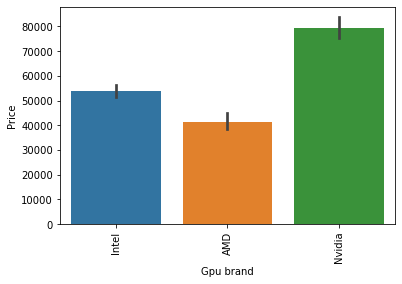

In [73]:
sns.barplot(x=laptop_df['Gpu brand'],y=laptop_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

now we don't need 'Gpu' column. we will drop it.

In [74]:
laptop_df.drop(columns=['Gpu'], inplace=True)

In [75]:
laptop_df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [76]:
laptop_df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

so we have so many operating system. now we can take few of them by using function.

In [77]:
def op_sys(os):
    if os=='Windows 10' or os=='Windows 7' or os=='Windows 10 S':
        return 'Windows'
    elif os=="macOS" or os=='Mac OS X':
        return 'Mac'
    else:
        return "Other/No OS/Linux"

In [78]:
laptop_df['OS']=laptop_df['OpSys'].apply(op_sys)

In [79]:
laptop_df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


now we can drop 'OpSys' column.

In [80]:
laptop_df.drop(columns=["OpSys"], inplace=True)

In [81]:
laptop_df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


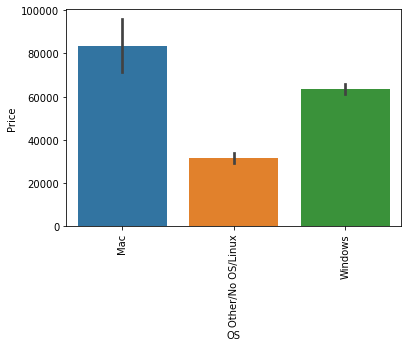

In [82]:
sns.barplot(x=laptop_df['OS'],y=laptop_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\archa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

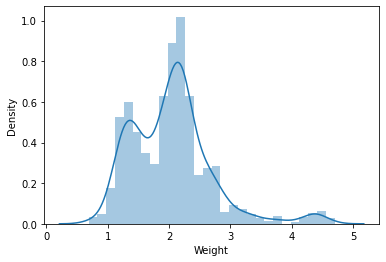

In [83]:
sns.distplot(laptop_df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

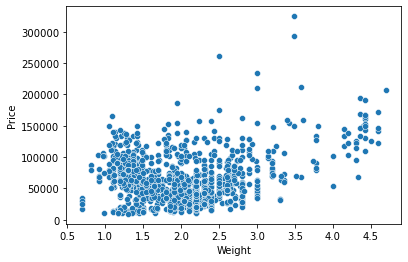

In [84]:
sns.scatterplot(x=laptop_df['Weight'],y=laptop_df['Price'])

In [85]:
laptop_df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

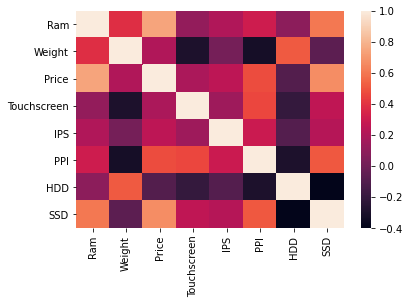

In [86]:
sns.heatmap(laptop_df.corr())

C:\Users\archa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

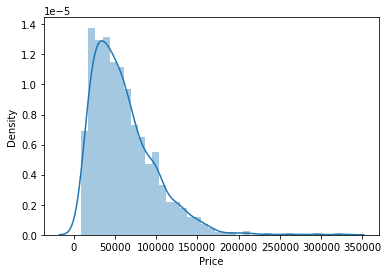

In [87]:
sns.distplot(laptop_df['Price'])

We see that the target variable Price has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [88]:
#skewness
print("The skewness of Price is {}".format(laptop_df['Price'].skew()))

The skewness of Price is 1.5197503994318975


Let's log transform this variable and see if this variable distribution can get any closer to normal.

Skewness is -0.17528027569556792


C:\Users\archa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

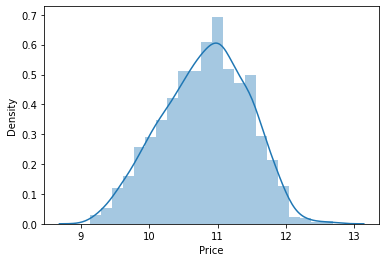

In [89]:
#now transforming the target variable
#sns.distplot(np.log(laptop_df['Price']))
target = np.log(laptop_df['Price'])
print ('Skewness is', target.skew())
sns.distplot(target)

In [90]:
x=laptop_df.drop(columns=['Price'])
y=target

In [91]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,other Intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [92]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [94]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,other Intel processor,0,0,Intel,Other/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Other/No OS/Linux


In [95]:
x_test

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand,OS
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454670,other Intel processor,500,0,Intel,Other/No OS/Linux
1251,HP,Notebook,4,1.86,0,0,100.454670,AMD processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel,Other/No OS/Linux
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,100.454670,AMD processor,500,0,AMD,Other/No OS/Linux
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,0,256,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,165.632118,Intel Core i7,0,256,Intel,Windows


In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

In [97]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.svm import SVR


In [99]:
#!pip install xgboost

In [119]:
from xgboost import XGBRegressor

In [99]:
x_train.head(1)

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand,OS
183,Toshiba,Notebook,8,2.0,0,0,100.45467,Intel Core i5,0,128,Intel,Windows


## Linear Regression

here we will create columnn transformer veriable('col_trans') then we pass index number of column to OnehotEncoder

1)Parameters : transformerslist of tuples
  List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.
  
2)Onehotencoder parameter:(sparse : boolean, default=True 
                                    Will return sparse matrix if set True else will return an array.)
                          (drop:‘first’-drop the first category in each feature. If only one category is present, the feature                                        will be dropped entirely.)

3)remainder{‘drop’, ‘passthrough’} or estimator, default=’drop’

  By default, only the specified columns in transformers are transformed and combined in the output, and the non-specified       columns are dropped. (default of 'drop'). By specifying remainder='passthrough', all remaining columns that were not           specified in transformers will be automatically passed through.


In [101]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2=LinearRegression()

linear_model_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

linear_model=linear_model_pipeline.fit(x_train,y_train)

y_pred=linear_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))


R2 Score of model 0.8073277448418676
Mean Absolute Error of model 0.2101782797642855


## Ridge Regression

In [104]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2=Ridge(alpha=10)

ridge_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

ridge_model=pipe_line.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))


R2 Score of model 0.81273310313118
Mean Absolute Error of model 0.2092680224258307


# Lasso Regression

In [102]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2=Lasso(alpha=0.001)

lasso_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

lasso_model=lasso_pipeline.fit(x_train,y_train)
y_pred=lasso_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))


R2 Score of model 0.8071853945317105
Mean Absolute Error of model 0.2111436161347257


## DecisionTreeRegressor

In [104]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=8)

Dtree_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

Dtree_model=Dtree_pipeline.fit(x_train,y_train)
y_pred=Dtree_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))


R2 Score of model 0.8408054534039227
Mean Absolute Error of model 0.18212188472006285


# KNeighborsRegressor

In [105]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2=KNeighborsRegressor(n_neighbors=3)

KNeighbors_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

KNeighbors_model=KNeighbors_pipeline.fit(x_train,y_train)
y_pred=KNeighbors_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))

R2 Score of model 0.8029050077622659
Mean Absolute Error of model 0.19307790621011486


# Scalar Vactor Machine

In [106]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2=SVR(kernel='rbf',C=10000,epsilon=0.1)

SVM_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

SVM_model=SVM_pipeline.fit(x_train,y_train)
y_pred=SVM_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))

R2 Score of model 0.8083180902283282
Mean Absolute Error of model 0.2023905942725167


# Random Forest

In [107]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

random_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

random_model=random_pipeline.fit(x_train,y_train)
y_pred=random_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))

R2 Score of model 0.8865301429227068
Mean Absolute Error of model 0.15875464162243105


# ExtraTrees

In [108]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

extratrees_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

extratree_model=extratrees_pipeline.fit(x_train,y_train)
y_pred=extratree_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))

R2 Score of model 0.8752445076798328
Mean Absolute Error of model 0.15999714033659998


# AdaBoost

In [111]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

adboost_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

adboost_model=adboost_pipeline.fit(x_train,y_train)
y_pred=adboost_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))

R2 Score of model 0.7908584265144503
Mean Absolute Error of model 0.22995873458738553


# Gradient Boost

In [115]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

gradientboost_pipeline=Pipeline([('Step1',step1),
                   ('Step2',step2)])

gradientboost_model=gradientboost_pipeline.fit(x_train,y_train)
y_pred=gradientboost_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))

R2 Score of model 0.8824553684336744
Mean Absolute Error of model 0.15945419080348747


# XgBoost

In [141]:
step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

step2= XGBRegressor(n_estimators=80,max_depth=4,learning_rate=0.3)

xgb_pipe_line=Pipeline([('Step1',step1),
                   ('Step2',step2)])

xgb_model=xgb_pipe_line.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))

R2 Score of model 0.8922893887815377
Mean Absolute Error of model 0.15573810562258947


# Voting Regression

step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe_line=Pipeline([('Step1',step1),
                   ('Step2',step2)])

model=pipe_line.fit(x_train,y_train)
y_pred=pipe_line.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))

# Stacking

step1=ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],
                  remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))


pipe_line=Pipeline([('Step1',step1),
                   ('Step2',step2)])

model=pipe_line.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('R2 Score of model',r2_score(y_test,y_pred))
print('Mean Absolute Error of model',mean_absolute_error(y_test,y_pred))

# Exporting the DataFrame and trained model

In [142]:
import pickle
pickle.dump(laptop_df,open('laptop_df.pkl','wb'))
pickle.dump(gradientboost_model,open('xgb_model.pkl','wb'))

XGBoost reggression method gave best accuracy as compare to other reggression method. so thats why we used XGBoost reggression model for predict the price of laptop.

# WEb appliction using Streamlit

In [110]:
laptop_df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,other Intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


Then we install streamlit library.(in below show that how to run it)

open anaconda prompt> write...  cd (paste our file location)

                    > write...  streamlit run file_name(our Streamlit file_name)